In [38]:
# This exercise generates a simple discrete event simulation model
# Based on: 
# https://www.youtube.com/watch?v=eSNfC-HOl44

# Daniel A. Sepulveda Estay ,PhD
# Technical University of Denmanrk, 200306

import simpy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
def generate_interarrival():
    return np.random.exponential(1./3.0) #3 customers per minute arrival time

def generate_service():
    return np.random.exponential(1./4.0) # 4 customers per minute service time

def cafe_run(env, servers):
    i = 0
    while True:
        i = i + 1
        yield env.timeout(generate_interarrival())
        env.process(customer(env, i, servers))
        
wait_t = []

def customer(env, customer, servers):
    with servers.request() as request:
        t_arrival = env.now
        # print(env.now, 'Customer {} arrives'.format(customer))
        yield request
        # print(env.now, 'Customer {} is being served'.format(customer))
        yield env.timeout(generate_service())
        # print(env.now, 'Customer {} departs'.format(customer))
        t_depart = env.now
        wait_t.append(t_depart-t_arrival)
        
        
obs_times = []
q_length = []

def observe(env,servers):
    while True:
        obs_times.append(env.now)
        q_length.append(len(servers.queue))
        yield env.timeout(1.0)
        
np.random.seed(0)

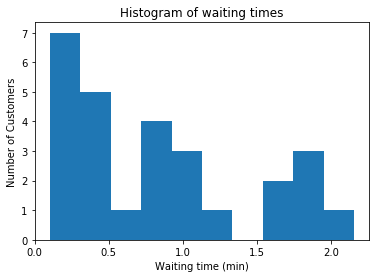

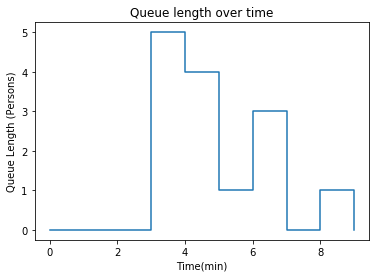

In [40]:
env = simpy.Environment()

servers = simpy.Resource(env, capacity=1) # create a shared resource
env.process(cafe_run(env, servers))
env.process(observe(env, servers))

env.run(until=10)





plt.figure()
plt.hist(wait_t)
plt.title('Histogram of waiting times')
plt.xlabel('Waiting time (min)')
plt.ylabel('Number of Customers')

plt.figure()
plt.title('Queue length over time')
plt.step(obs_times, q_length, where='post')
plt.xlabel('Time(min)')
plt.ylabel('Queue Length (Persons)')
plt.show()